## Hierarichal Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
## import iris dataset
iris=datasets.load_iris()

In [9]:
iris_data=pd.DataFrame(iris.data)

In [14]:
iris_data.columns=iris.feature_names

In [15]:
iris_data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
## Standardisation
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(iris_data)

In [19]:
X_scaled.shape

(150, 4)

In [53]:
## now we shall use pca and reduce the dimensions
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_scaled=pca.fit_transform(X_scaled)


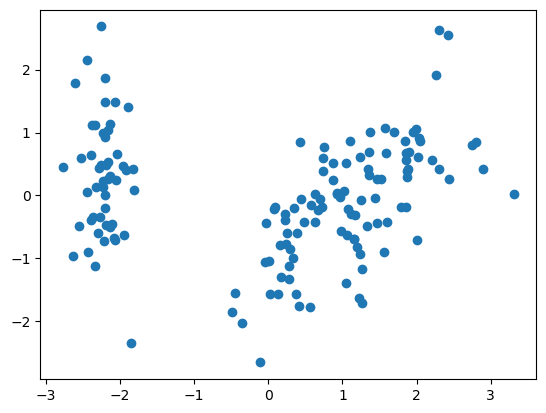

In [22]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

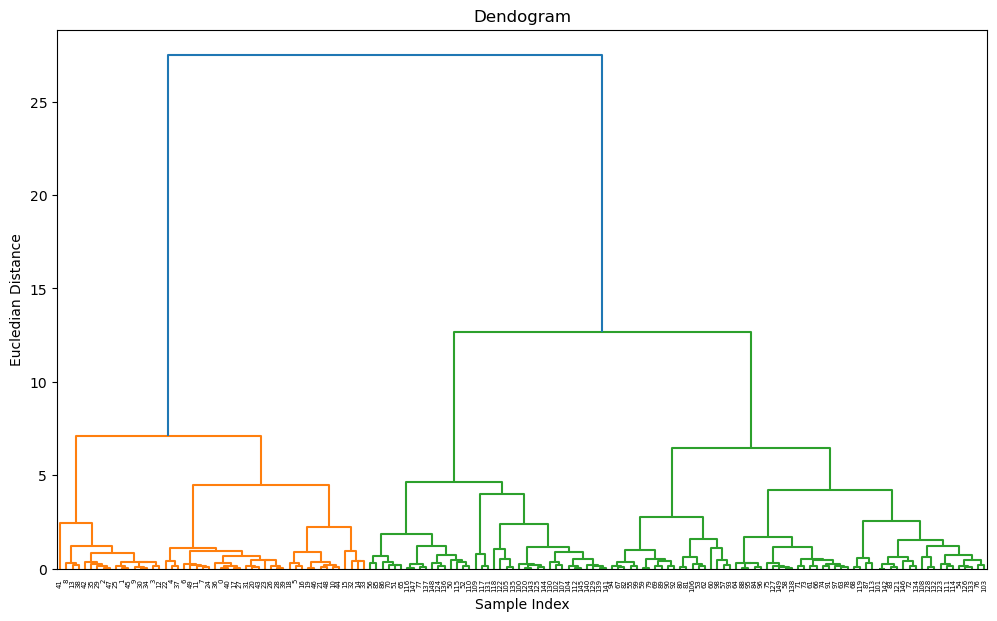

In [35]:
## Agglomerative Clustering To construct a dendogram
import scipy.cluster.hierarchy as sc

## plot the dendogram
plt.figure(figsize=(12,7))
plt.title('Dendogram')


## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean')
cluster.fit(pca_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [38]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

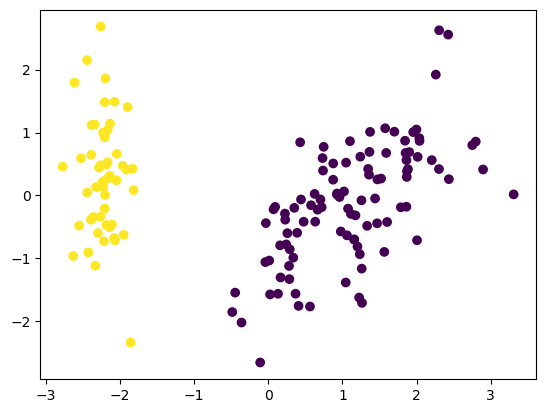

In [41]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [43]:
from sklearn.metrics import silhouette_score
silhoutte_coefficients=[]

for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k)
    agglo.fit(X_scaled)
    score=silhouette_score(X_scaled,agglo.labels_)
    silhoutte_coefficients.append(score)

In [44]:
silhoutte_coefficients

[0.5770346019475988,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

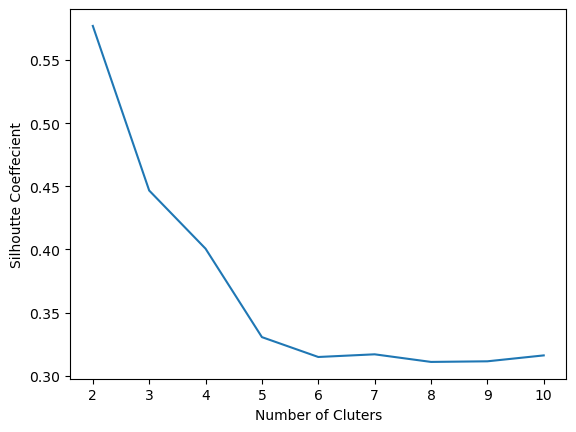

In [52]:
## plotting silhouette score
plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()